In [1]:
%matplotlib inline
%run ./FImport.py
%load_ext autoreload

from FLib import *
from functools import partial

In [2]:
from adjustText import adjust_text

In [3]:
def plotTraj(ax, FBS, **kwargs):
    ax.plot(FBS.x[:, 0], FBS.x[:, 1])

In [16]:
def plotQBeta(ax, x1, x2):
    a = x2[1]
    b = x1[1]-x2[1]
    
    P = np.linspace(0,1)
    y = a + b*(1-P)**2
    ax.plot(P, y)
    
    
def plotLBeta(ax, x1, x2):
    ax.plot([x1[0],x2[0]], [x1[1],x2[1]])
    
    
def plotBeta(ax):
    x1 = (0,2.2)
    x2 = (1,1.3)

    plotQBeta(ax, x1, x2)
    plotLBeta(ax, x1, x2)
    
    ax.scatter([x1[0],x2[0]], [x1[1],x2[1]], marker="o", s=15, facecolors='w', edgecolors='black', zorder=10)
    
    #texts = [ax.text(*x1, fr"$\beta_0 = {x1[1]}$", fontsize=10)]
    texts = [ax.text(*x1, fr"$\beta_0$", fontsize=10)]
    adjust_text(texts,  expand_points=(5, 2), arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=-0.2", lw=1), ax=ax)
    
    ax.locator_params(axis='x', nbins=2)
    ax.locator_params(axis='y', nbins=2)
    
    ax.set_xlabel(r"$P$")
    ax.set_ylabel(r"$\beta(P)$")

    ax.plot(*[-1,0], c="C0", label=r"quadratic case")
    ax.plot(*[-1,0], c="C1", label=r"linear case")
    
    #ax.set_aspect(1)
    ax.set_xlim(-.03,1.03)
    ax.set_ylim(x2[1]-.03,x1[1]+.03)
    ax.legend(bbox_to_anchor=(0.6, 0.5, 0.5, 0.5), framealpha=1)

In [17]:
def plotLinearAlpha(ax):
    x0 = (0,-2.2)
    x1 = (1,1.3)
    ax.plot([x0[0],x1[0]], [x0[1],x1[1]], zorder=10)
    
    ax.hlines(0, x0[0], x1[0], color="black", linewidth=1)
    ax.locator_params(axis='x', nbins=2)
    ax.locator_params(axis='y', nbins=2)
    
    xZero= -x0[1] * ((x1[0]-x0[0])/(x1[1]-x0[1]))
    
    ax.scatter([x0[0],x1[0]], [x0[1],x1[1]], marker="o", s=15, facecolors='w', edgecolors='black', zorder=10)
    ax.scatter(xZero, 0, marker="o", s=15, facecolors='w', edgecolors='black', zorder=10)
    
    texts = [ax.text(xZero,0, r"$\alpha^{-1}(0)$", fontsize=10)]
    adjust_text(texts,  expand_points=(3, 2), arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=-0.2", lw=1), ax=ax)
  
    ax.set_xlabel(r"$I$")
    ax.set_ylabel(r"$\alpha(I)$")

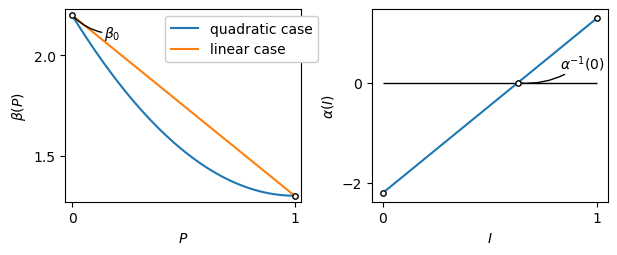

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(7, 2.5), dpi=100)
plotBeta(axs[0])
plotLinearAlpha(axs[1])

plt.subplots_adjust(hspace=0, wspace=0.3)
plt.savefig("./fig/exAlphaAndBeta.pdf")

# Plot of the cost function

In [4]:
def Jh(u, b0, a, d_N, h=0.8):
    d3 = 1 - 1/b0
    d4 = 1 - 1/(a*b0)
    
    if d_N - u > d3: return h * ((b0 - 1)/(b0))**2 + (1 - h)* u**2
    elif d_N - u < d4: return h * ((a*b0 - 1)/(a*b0))**2 + (1 - h)* u**2
    else: return u**2 - 2*h*d_N*u + h*d_N**2
    
def getSwPoint_d():
    d3 = 1 - 1/b0
    d4 = 1 - 1/(a*b0)
    return d3, d4


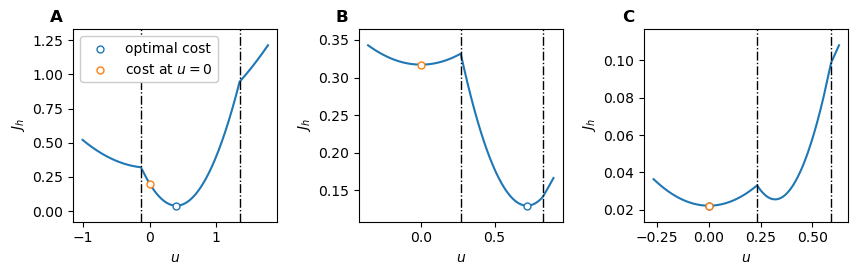

In [190]:
def plotCost(ax, b0, a, d_N, upRange=1, lowRange=1, labelTop=True):
    d3, d4 = 1 - 1/b0, 1 - 1/(a*b0)
    d = np.arange(d4 - abs(d4)*upRange, d3 + abs(d3)*lowRange, 0.001)
    u = d_N - d

    ax.plot(u, [Jh(i, b0, a, d_N) for i in u])

    f = partial(Jh, b0=b0, a=a, d_N=d_N)
    uMin = spy.optimize.brute(f, [(min(d), max(d))] , disp=0)[0]
    ax.scatter(uMin, Jh(uMin, b0, a, d_N), marker="o", s=25, facecolors='w', edgecolors='C0', zorder=10)
    ax.scatter(0, Jh(0, b0, a, d_N), marker="o", s=25, facecolors='w', edgecolors='C1', zorder=10)

    ymin = min(Jh(i, b0, a, d_N) for i in u)
    ymax = max(Jh(i, b0, a, d_N) for i in u)
    axYmin, axYmax = ymin - (ymax-ymin)*0.1, ymax + (ymax-ymin)*0.1
    ax.set_ylim(axYmin, axYmax)
    
    ax.vlines([d_N - d3, d_N - d4], axYmin, axYmax, linewidth=1, linestyles="-.", color="black")
    
    #if labelTop:
    #    texts = [ax.text(d_N - d3, max(Jh(i, b0, a, d_N) for i in u), r"$d_N - d^{(3)}$", fontsize=10, ha='right', va="top")]
    #    texts = [ax.text(d_N - d4, max(Jh(i, b0, a, d_N) for i in u), r"$d_N - d^{(4)}$", fontsize=10, ha='right', va="top")]
    #    adjust_text(texts,  expand_points=(-1, 1.2), ax=ax)
    #else:
    #    texts = [ax.text(d_N - d3, ymin, r"$d_N - d^{(3)}$", fontsize=10, ha='right', va="bottom")]
    #    texts = [ax.text(d_N - d4, ymin, r"$d_N - d^{(4)}$", fontsize=10, ha='right', va="bottom")]
    
    ax.set_xlabel("$u$")
    ax.set_ylabel("$J_h$")


fig, axs = plt.subplots(1, 3, figsize=(10,2.5))
plotCost(axs[0], 2.7, 0.2, 0.5, upRange=0.5, lowRange=1.4)
plotCost(axs[1], 2.7, 0.4, 0.9, labelTop=False)
plotCost(axs[2], 1.2, 0.7, 0.4, upRange=0.2, lowRange=3)

axs[0].scatter(None,None, marker="o", s=25, facecolors='w', edgecolors='C0', zorder=10, label=r"optimal cost")
axs[0].scatter(None,None, marker="o", s=25, facecolors='w', edgecolors='C1', zorder=10, label=r"cost at $u=0$")
legend = axs[0].legend(bbox_to_anchor=(0,1,1,0))
legend.get_frame().set_facecolor((1, 1, 1, 1))
legend.get_frame().set_alpha(None)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
betterPanelLabel(axs, offset=[0.05, -0.05])

plt.savefig("./fig/exCost.pdf", bbox_inches='tight')